# Improving plots - Line Graphs

In the lesson we learned how to improve our scatterplots using coloring, marker styles and marker sizes using `seaborn`. Now it is time to put your coding skills to work! A lot of the tools we used for improving our scatterplots can also be applied to line graphs. In this exercise you will experiment with communicating data in different ways with **line graphs**.

In [4]:
# import necessary packages 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In this practice we'll be working with the `fmri` built-in seaborn dataset. Let's load and preview the dataset here:

In [14]:
# load fmri dataset
fmri = sns.load_dataset("fmri")
# preview fmri dataset
fmri.head()
fmri.tail()

,subject,timepoint,event,region,signal
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367
1063,s0,0,cue,parietal,-0.006899


fMRI data is what we call *timeseries* data, because it measures a *signal* (here, the activation strength in certain parts of the brain) over a period of *time* (here, 18 timepoints). Based on this information, we know a **line graph** is the best way to represent the changes in activation signal in the brain over the measurement period. The code for creating a line graph is super simple and really similar to what we learned for a scatterplot:

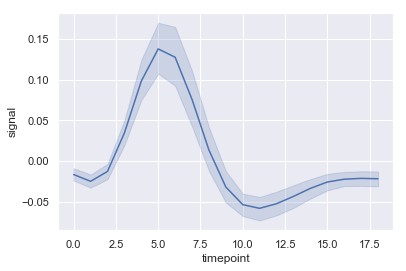

In [16]:
# line graph of fmri signal over time
sns.lineplot(x="timepoint", y="signal", data=fmri)

Can you guess why this plot returns both a line and a shaded area?

If we look back at our data preview, we can see that the `fmri` dataset contains data for several subjects - meaning each `timepoint` has not just one, but multiple corresponding `signal` values. When this happens, `seaborn` knows to take the **mean** of the data (shown as the single line), but also report the **spread** of the data (here, the *confidence interval*, shown in the shaded band) to give us a sense of how similar/different the signal is across our subjects.

Now that we know the basics of how to create a line graph in `seaborn`, let's try improving the graph using the skills we learned for scatterplots. 

Let's separate (i.e. *color*) the plot by the `event` column to see the differences between the *cue* and *stim* conditions. (*HINT: in the scatterplot example, we separated the plot by **species**.*)

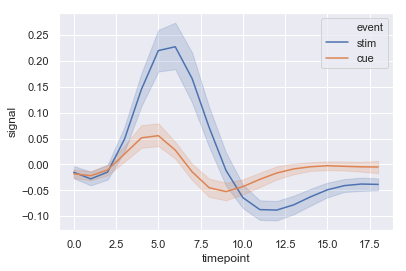

In [23]:
# separate plot by event column
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)

Great!

In scatterplots, we also learned to change the marker *style* based on a certain column (or *variable*) in our dataset. In addition to separating the plot by `event`, also change the line *style* by `event`. 

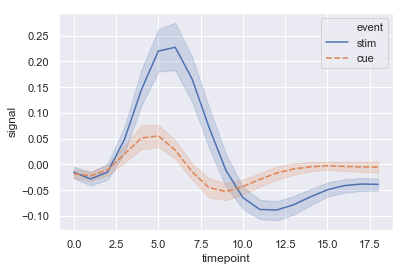

In [24]:
# separate and style plot by event column
sns.lineplot(x="timepoint", y="signal", hue="event", style="event", data=fmri)

Now you can even more clearly illustrate the difference between the `stim` and `cue` events. 

We can also illustrate differences between variables using *marker* style rather than *line* style. We can do this using the `markers` and `dashes` parameters of the `lineplot` function. These parameters are **boolean** variables. Based on that information, how would you set the parameters to show the different `event` plots using line markers rather than dashed lines. Write the code for this below:

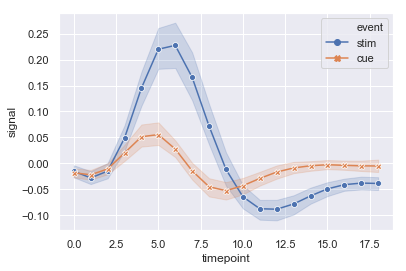

In [27]:
# # separate and style (markers) plot by event column
# HINT: copy the line of code from above and add markers and dashes parameters, with the appropriate boolean values
sns.lineplot(x="timepoint", y="signal", hue="event", style="event", markers=True, dashes=False, data=fmri)

We also learned that we can improve our plots to illustrate several different variables at once (like when we colored the points by *species* and sized by *sepal_length*). Let's see how this works with line plots! 

Write code below to *style* the lines by `event` and *color* the lines by `region`.

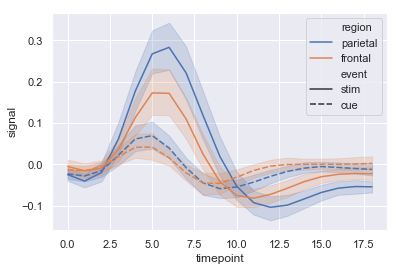

In [44]:
# style the lines by event and color the lines by region
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)

Now we should see 4 lines on our plot: Two orange lines corresponding to the `frontal` region of the brain and two blue lines corresponding to the `parietal` region of the brain. For each color, the solid line represents the `stim` event and the dashed line represents the `cue` event. 

This helps us understand our data on a more fine-grained level. What kinds of conclusions can you make using this plot that you could not make using the previous plots?

Another thing we learned in the scatterplots lesson was to change the color palette to suit our needs or aesthetic preferences. Below, re-create the previous plot illustrating both region and event, but customize the color palette. Built-in color palettes are detailed here: https://seaborn.pydata.org/tutorial/color_palettes.html, but remember what we discussed about categorical vs. continuous variables and what kinds of color palettes are appropriate for each. What kind of variable are we illustrating with color here?

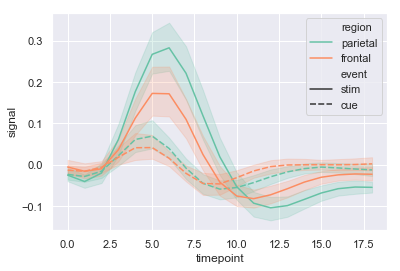

In [43]:
# change color palette
sns.lineplot(x="timepoint", y="signal", hue="region", palette="Set2", style="event", data=fmri)

## Bonus

Sometimes you want to only focus on certain subsets of your data. What if we just wanted to focus on the frontal region of the brain? How do you think we could generate a plot that shows only the data for rows where `region == "frontal"` and colors the lines by `event`? Experiment to see if you can get this to work below.

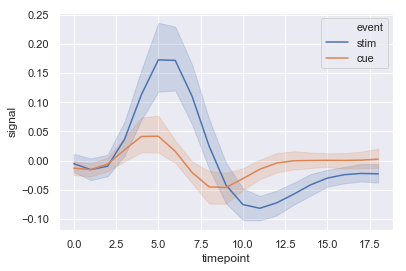

In [41]:
# plot data for frontal region only, colored by event
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri.query("region == 'frontal'"))

What if we wanted to generate a plot that colors the lines by `region` and styled by `event`, but only for data from subject `s11`? 

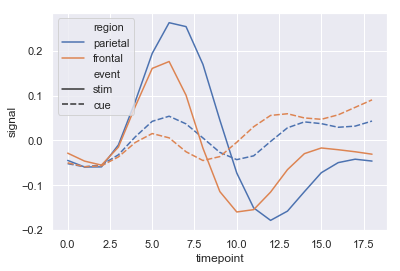

In [40]:
# plot subject 11, colored by region, styled by event
sns.lineplot(x="timepoint", y="signal", hue="region", style='event', data=fmri.query("subject == 's11'"))

You'll notice the shaded bands around the solid lines are gone in this plot - this is because when we isolate data from a single subject each line only has one measurement per timepoint. In other words we are no longer averaging across measurements from several subjects, regions or events - we are seeing the real time series for this person's fMRI signal. 

You may notice the patterns here are not quite as clean as they may have been when averaging across several subjects. This illustrates exactly why we take several *samples* in scientific experiments, as it helps to filter out *noise* or random fluctuations from trial to trial and helps us understand *general trends* that can apply to the population. 

Now, what if we wanted to see every subjects data separated, but on the same graph? To acheive this, we would set `estimtor = None`, which tells `seaborn` not to take any estimate of the *mean*, and we specify `units = "subject"`, to command `seaborn` to treat each subject as a *unit*, and therefore plot it on a separate line. You can see and example in the code below, which does this while also stratifying by `event` and focusing on just the signals from the frontal region. 

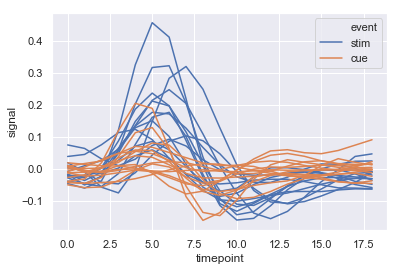

In [39]:
# plot subjects separately
sns.lineplot(x="timepoint", y="signal", hue="event", units="subject", estimator=None, 
             data=fmri.query("region == 'frontal'"))

Using the code above as a baseline, play around with some of the other improvement parameters we've learned in this practice to communicate a different slice of the data. 

In [38]:
# add/change parameters of code above to communicate something new in your data
